In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.image as mpimg

In [51]:
img = mpimg.imread('/Users/nduginets/PycharmProjects/master-diploma/300img/semantic_map/ISIC_0000396_semantic.png')

In [54]:
import queue

def bfs(image, mask, i, j, current_color, component_index):
    q = queue.Queue()
    q.put((i, j))
    while not q.empty():
        i, j = q.get()
        if i < 0 or j < 0:
            continue
        if i >= image.shape[0] or j >= image.shape[1]:
            continue
        if mask[i][j] == 0 and image[i][j] == current_color:
            mask[i][j] = component_index
            q.put((i - 1, j - 1))
            q.put((i - 1, j))
            q.put((i - 1, j + 1))

            q.put((i, j - 1))
            q.put((i, j))
            q.put((i, j + 1))

            q.put((i + 1, j - 1))
            q.put((i + 1, j))
            q.put((i + 1, j + 1))

def group_by_classes(image):
    component_color = 1
    mask = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if mask[i][j] == 0:
                color = image[i][j]
                bfs(image, mask, i, j, color, component_color)
                component_color += 1
    return image, mask


def union_areas_to_rect(image):
    img, msk = group_by_classes(image)

    group_classes = np.unique(msk)

    class_index = []
    for cls in group_classes:
        i_idx, j_idx = np.where(msk == cls)
        min_i_idx = i_idx.min()
        max_i_idx = i_idx.max()

        min_j_idx = j_idx.min()
        max_j_idx = j_idx.max()
        color = img[i_idx[0]][j_idx[1]]
        class_index.append((cls, color, (min_i_idx, min_j_idx), (max_i_idx, max_j_idx)))

    for i in range(len(class_index)):
        for j in range(i + 1, len(class_index)):
            a_i_1, a_j_1 = class_index[i][2]
            a_i_2, a_j_2 = class_index[i][3]

            b_i_1, b_j_1 = class_index[j][2]
            b_i_2, b_j_2 = class_index[j][3]

            if a_i_1 < b_i_2 and a_i_2 > b_i_1 and a_j_1 < b_j_2 and a_j_2 > b_j_1:
                sq_a = (a_i_1 - a_i_2) ** 2 + (a_j_1 - a_j_2) ** 2
                sq_b = (b_i_1 - b_i_2) ** 2 + (b_j_1 - b_j_2) ** 2
                # case when rect_a in rect_b covered by square comparison
                if sq_a < sq_b:
                        tmp = class_index[i]
                        class_index[i] = class_index[j]
                        class_index[j] = tmp

    rectangle_image = np.zeros(msk.shape)
    for (cls, color, (min_i, min_j), (max_i, max_j)) in class_index:
        rectangle_image[min_i: max_i, min_j:max_j] = color
    return rectangle_image

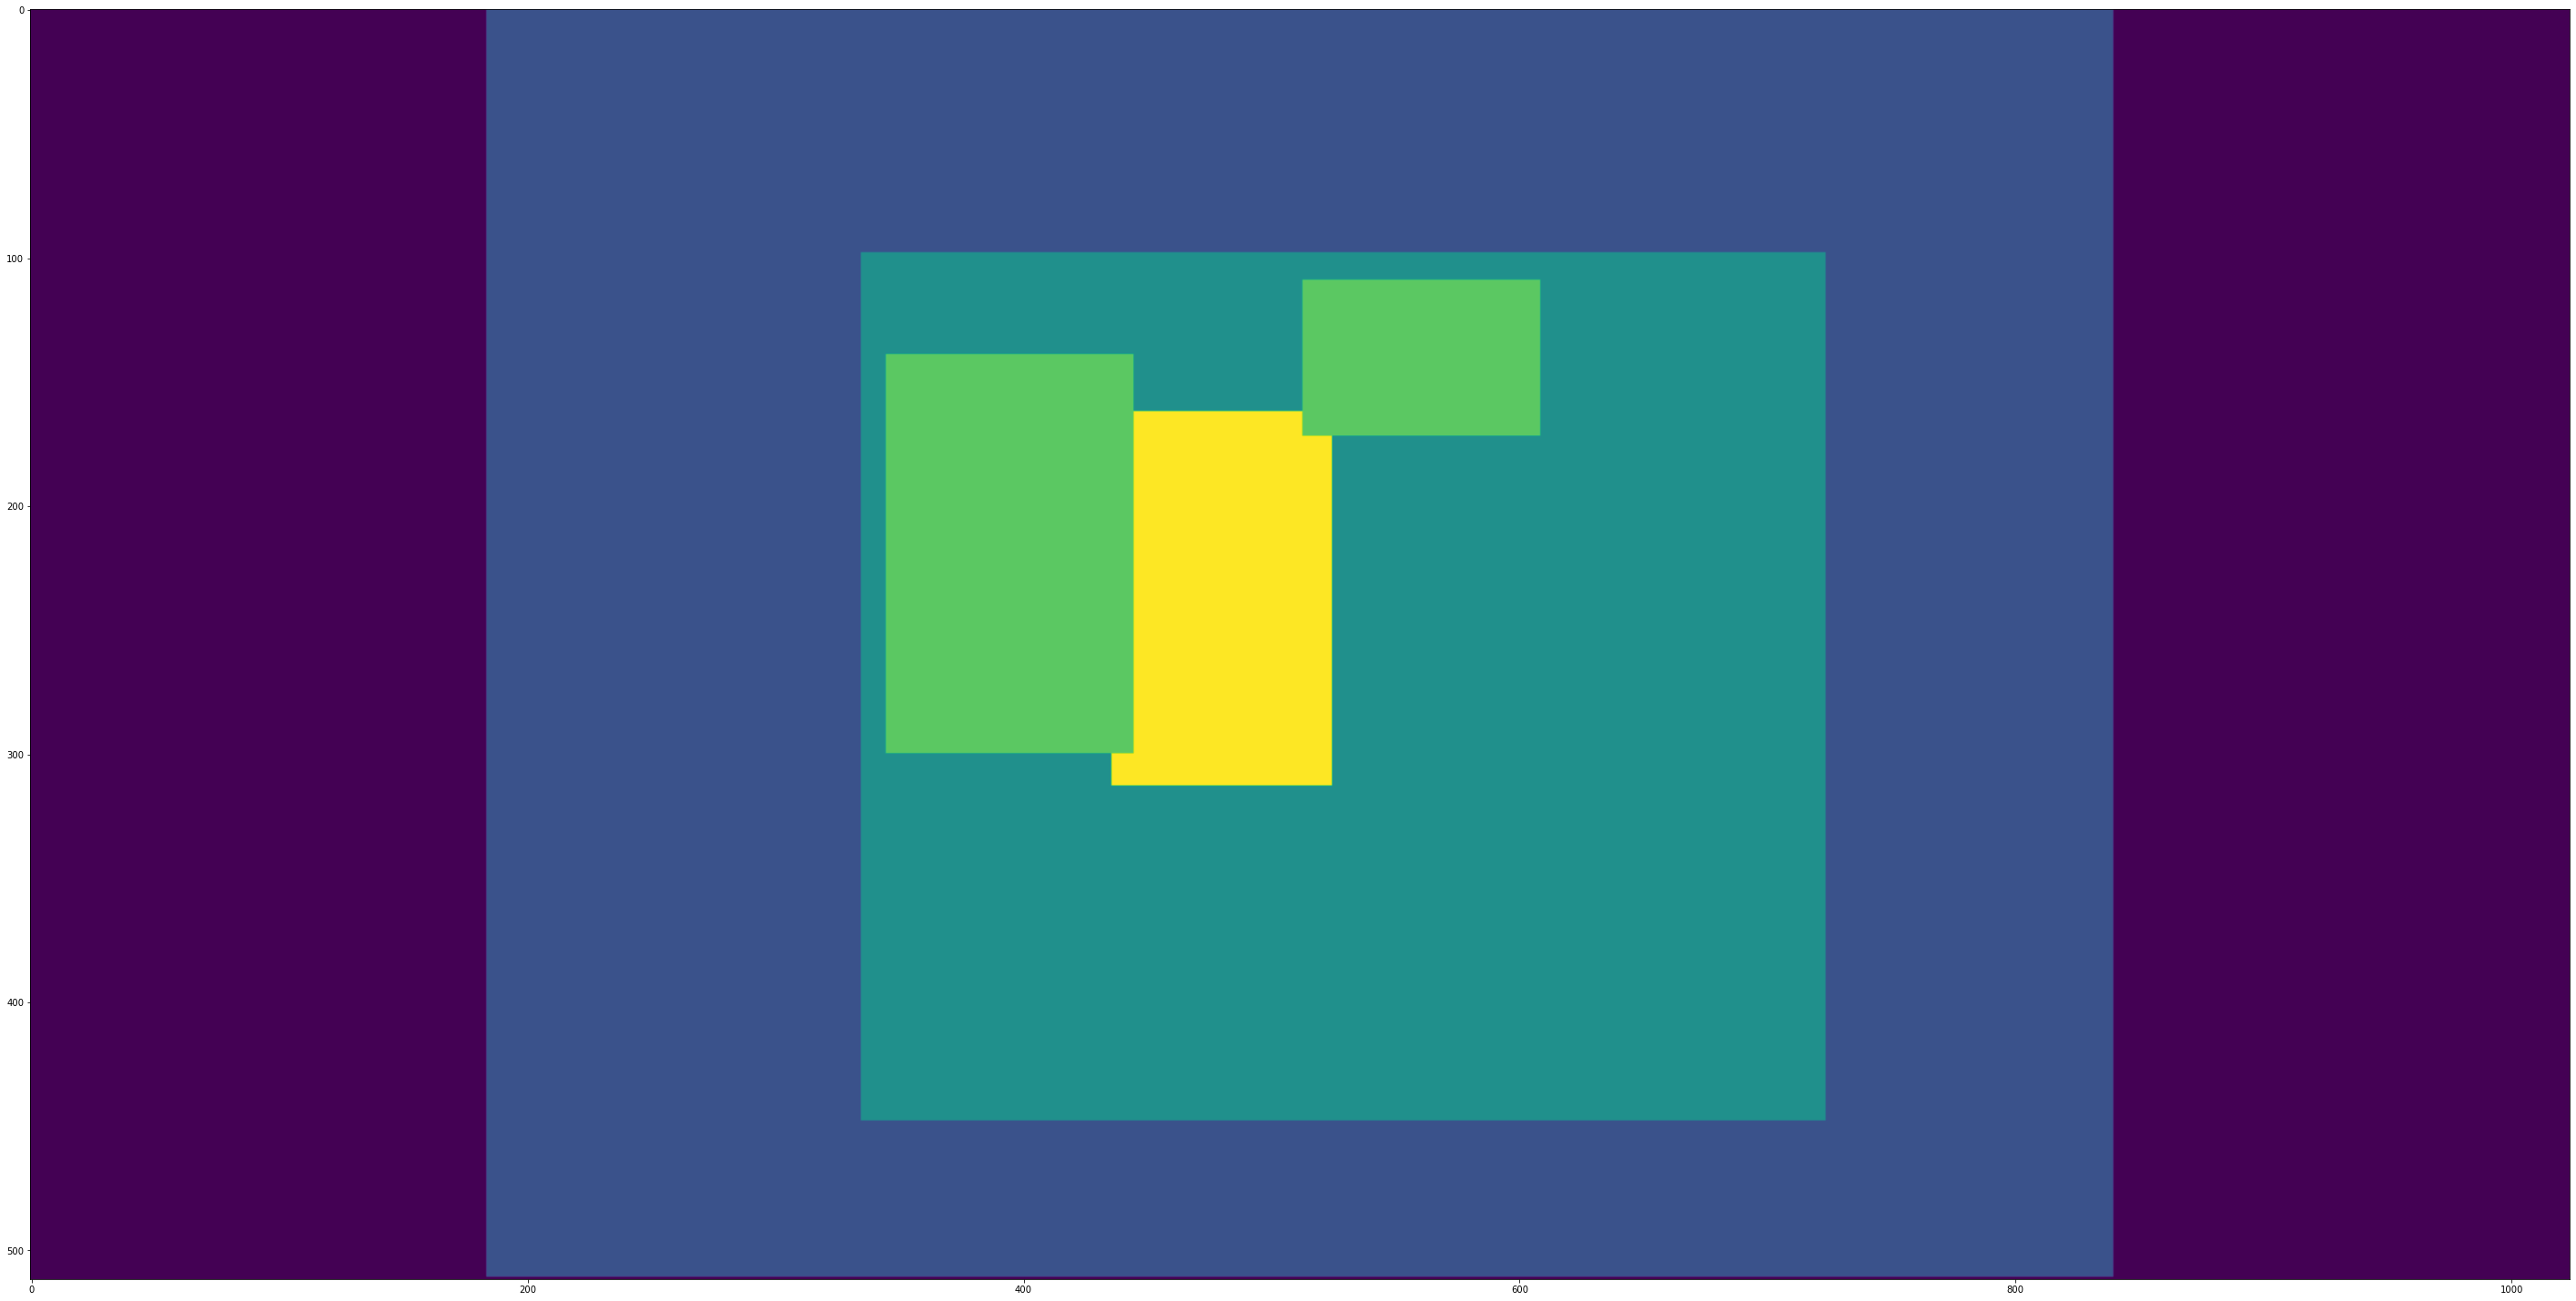

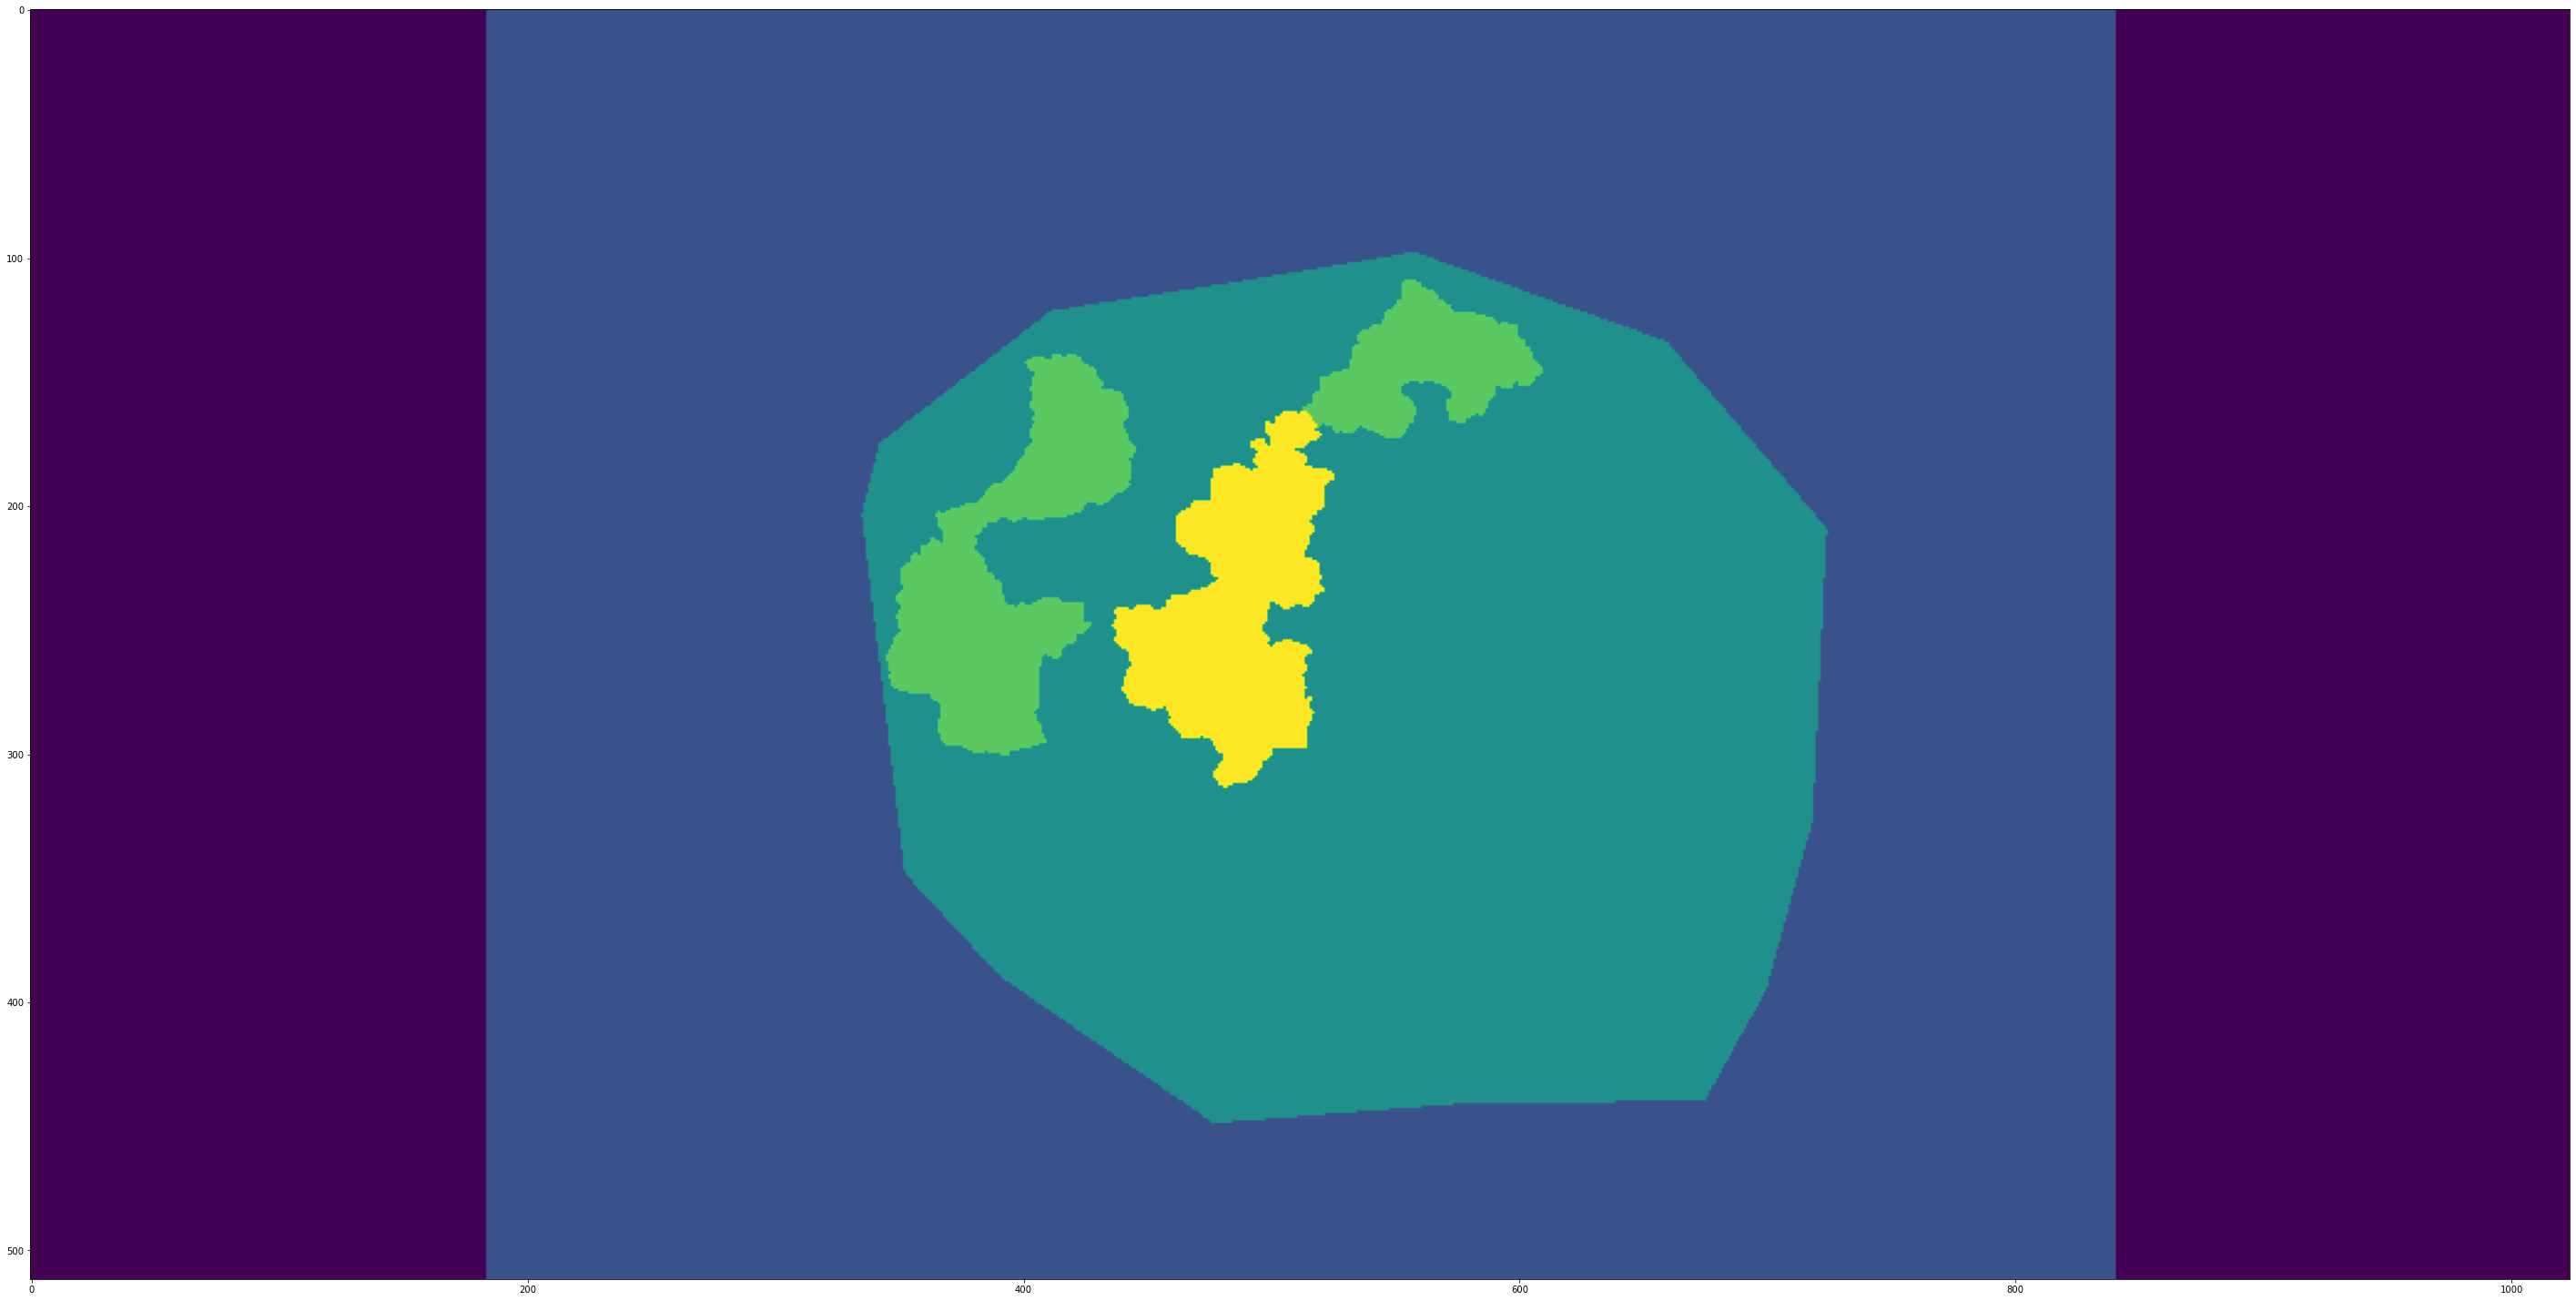

In [55]:
rectangle_image = union_areas_to_rect(img)

plt.figure(figsize = (50,50))
plt.imshow(rectangle_image)

plt.figure(figsize = (50,50))
plt.imshow(img)

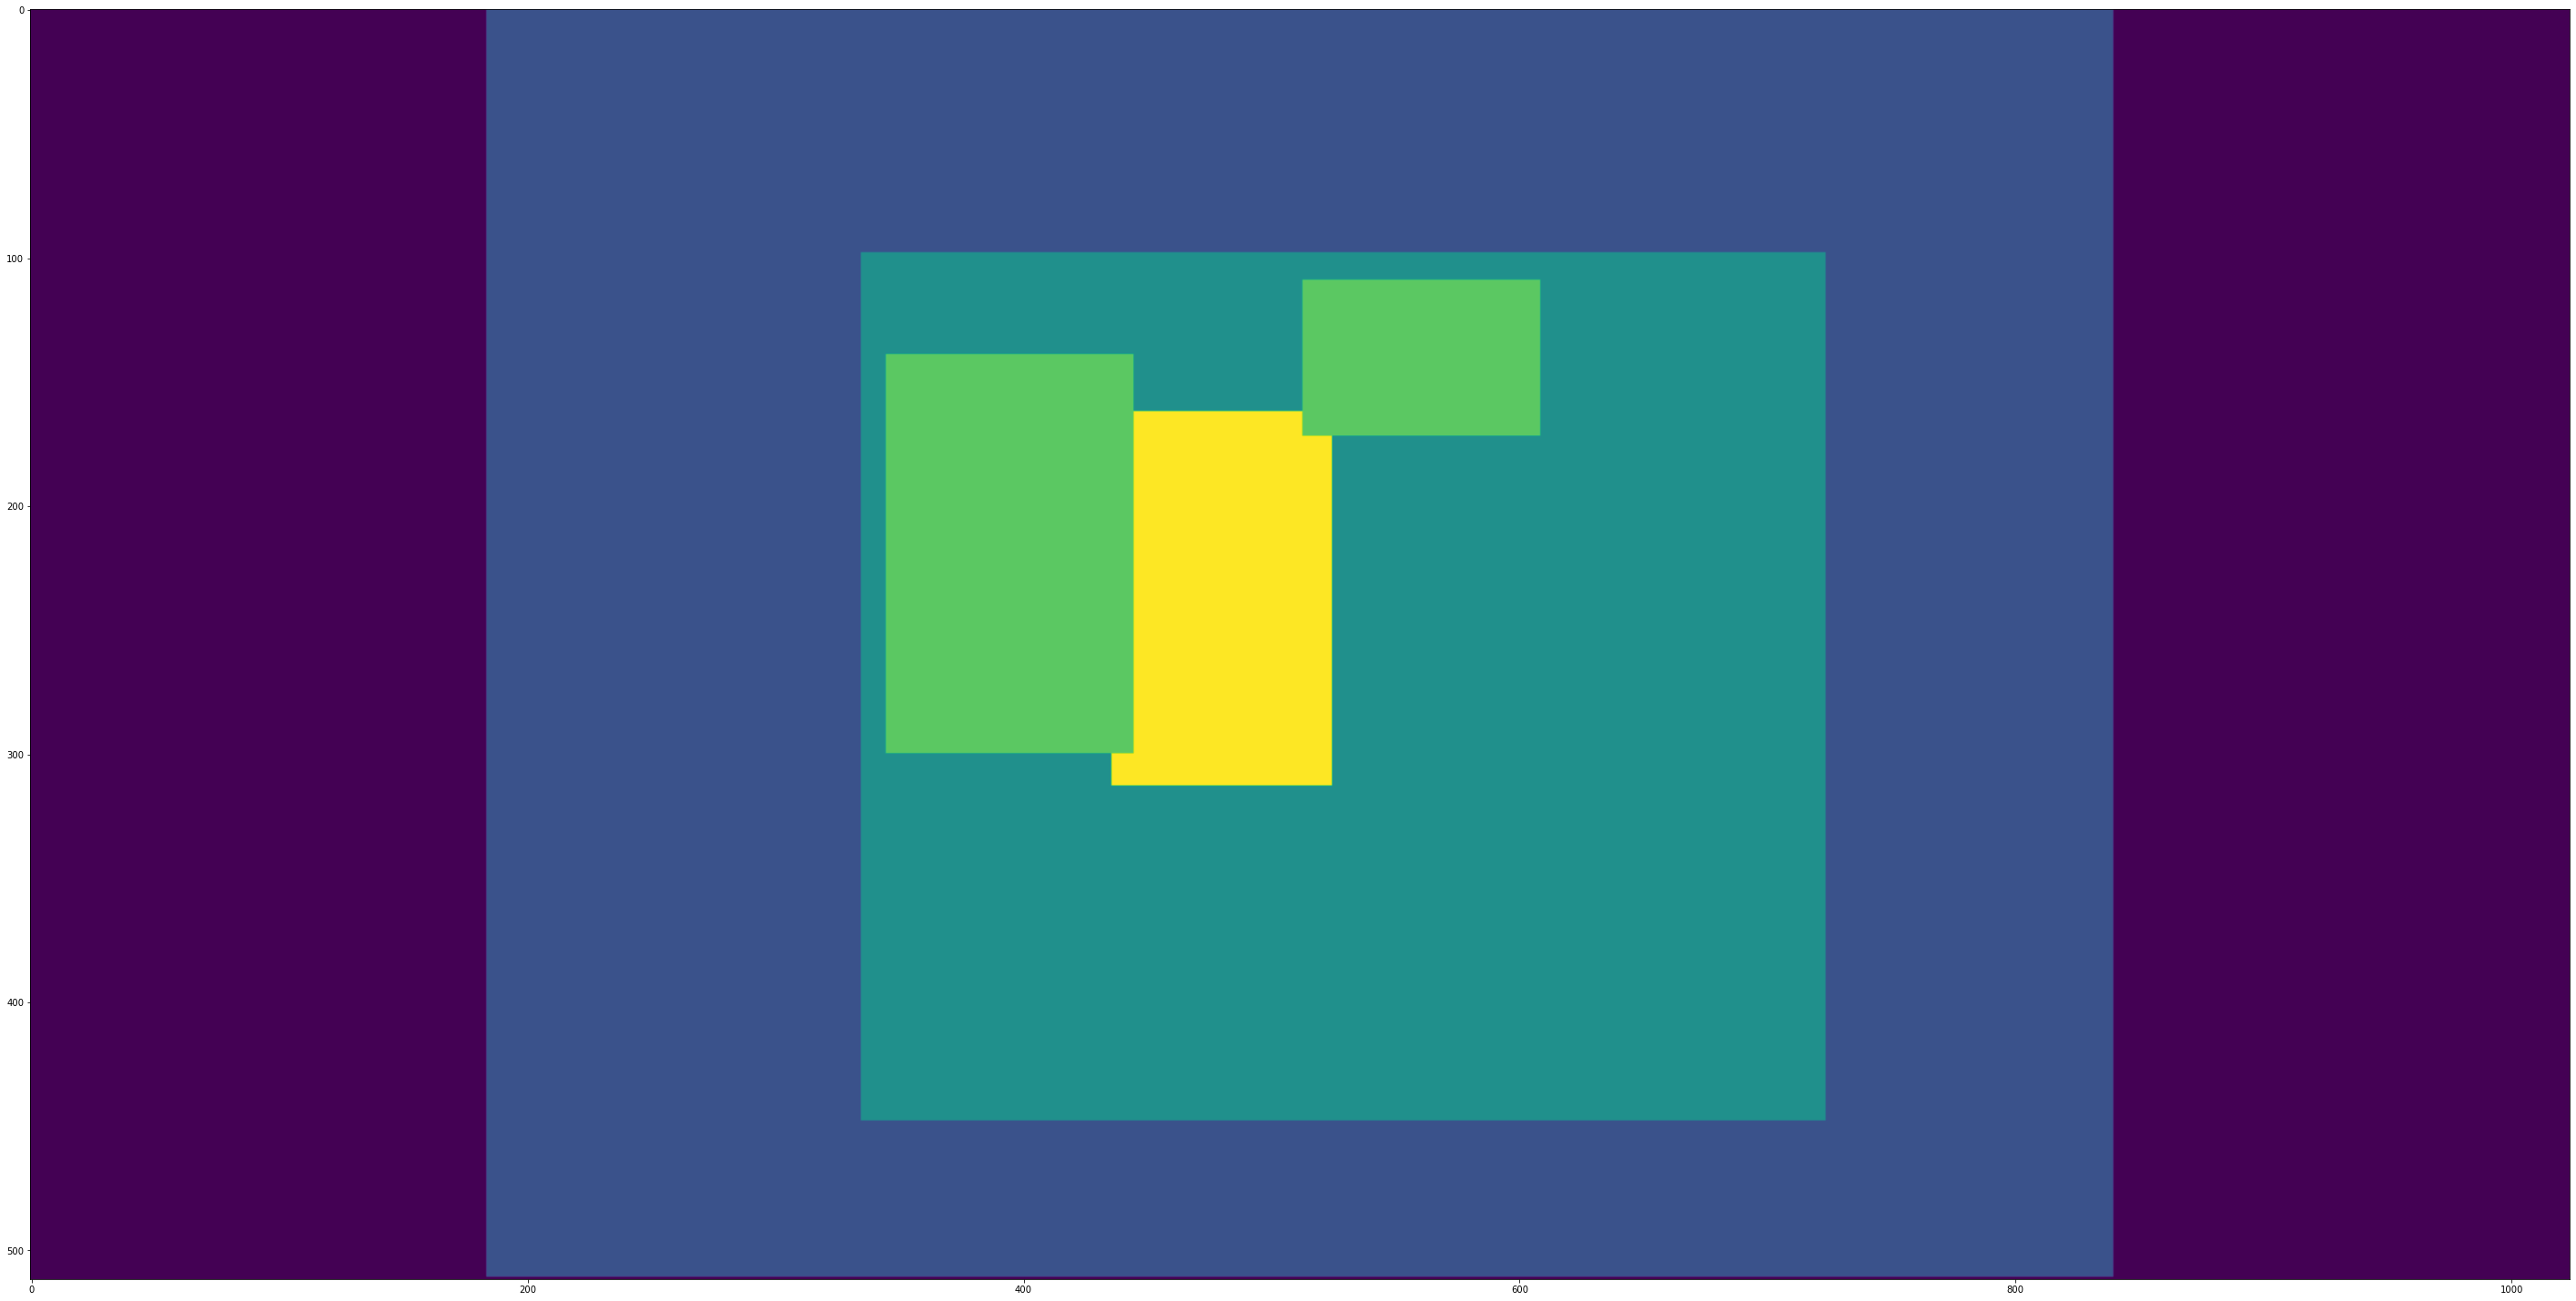

In [56]:
img1 = mpimg.imread('/Users/nduginets/PycharmProjects/master-diploma/300img/boxes_semantic_map/ISIC_0000396_semantic.png')
plt.figure(figsize = (50,50))
plt.imshow(img1)

In [59]:
print(np.unique(img1))
print(np.unique(img))

[0.         0.00392157 0.00784314 0.01176471 0.01568628]
[0.         0.00392157 0.00784314 0.01176471 0.01568628]
